# 과제 설명
1. 코드 내 ### 1 ###, ### 2 ### 과 같은 빈칸을 채우고 보고서에 해당 코드에 대해 설명하기 - 8개
2. 보고서에 #[1. 질문]# 의 질문에 대한 답변 설명하기 - 2개

보고서는 1장 내로 적어주세요

In [10]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            nn.Flatten(), ### 1 ### 현재 이미지 데이터의 shape는 (64, 1, 28, 28)로 구성되어 있다.허나, single perceptron에서 input은 (batch size, n) 이런 구조이므로 1*28*28을 해줘야한다.
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, inputs):
        return self.network(inputs)

In [11]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms ### 2 ### transforms / torchvision, torchaudio, torchtext 이렇게 3개의 데이터를 주로 사용하는데, 이것은 모두 datasets라는 라이브러리에 저장되어 있다.
from tqdm import tqdm

def train(configs):
    # Dataset
    train_dataset = datasets.MNIST(
        root=configs['root'],
        train=True,
        transform=transforms.ToTensor(),
        download=True
    )
    val_dataset = datasets.MNIST(
        root=configs['root'],
        train=False,
        transform=transforms.ToTensor(),
        download=True
    )

    # DataLoader
    train_dataloader = DataLoader(
        dataset=train_dataset,
        batch_size=configs['batch_size'],
        shuffle=True,
    )
    val_dataloader = DataLoader(
        dataset=val_dataset,
        batch_size=configs['batch_size'],
        shuffle=False,
    )

    for inputs, labels in train_dataloader:
        print(f'Inputs : {inputs.shape}')
        print(f'Labels : {labels.shape}')
        break
    
    # Model
    net = NeuralNetwork()

    # Loss Fuction
    criterion = nn.CrossEntropyLoss(reduction='sum')

    # Optimizer
    optimizer = optim.SGD(params=net.parameters(), lr=1e-3) ### 3 ###, lr=1e-3)

    # Device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f'Device : {device}')

    net = net.to(device)
    
    best_eval_loss = 1000

    for epoch in range(configs['epochs']):
        print(f'Epoch : {epoch + 1} ==============================')
        
        # Train
        net.train()
        train_loss = 0.0
        for inputs, labels in tqdm(train_dataloader):
            inputs, labels = inputs.to(device), labels.to(device) ### 4 ###
            # 1. Forward
            outputs = net(inputs) ### 5 ###
            # 2. Compute Loss
            loss = criterion(outputs, labels)
            # 3. Backward
            loss.backward() ### 6 ###
            # 4. Gradient Descent
            optimizer.step()
            # 5. Gradient Intialization
            optimizer.zero_grad() ### 7 ###

            train_loss += loss.item()

        train_loss = train_loss / 60000.0
        print(f'Train Loss : {train_loss}')

        net.eval()
        eval_loss = 0.0
        for inputs, labels in tqdm(val_dataloader):
            inputs, labels = inputs.to(device), labels.to(device) ### 4 ###
            
            #[1. 85번째 줄 코드가 필요한 이유는 무엇일까요?]# 마지막으로 evaluation을 할 때에는 gradient를 계산하고 저장하여 학습을 하는 것이 아니기 때문에, gradient를 따로 저장할 필요가 없다고 설정하는 것임.
            with torch.no_grad():
                # Forward
                outputs = net(inputs)
                # Compute Loss
                loss = criterion(outputs, labels)

            eval_loss += loss.item()
        
        eval_loss = eval_loss / 10000.0
        print(f'Eval Loss : {eval_loss}')

        #[2. 96~98번째 줄 코드가 필요한 이유는 무엇일까요?]# 학습을 진행하다보면, loss 값이 끊임없이 줄어들다가 증가한다. 이때, overfitting에 의한 loss 값의 증가로 overfitting이 되기 전, loss 값이 줄어들다 증가하는 구간이 training epoch의 최적값이므로 이 값을 저장해야한다.
        if best_eval_loss > eval_loss:
            best_eval_loss = eval_loss
            torch.save(net.state_dict(), 'best_model_weight.pth')

In [12]:
configs = {
    'root': 'data',
    'batch_size': 64,
    'epochs': 20,
}

train(configs)

Inputs : torch.Size([64, 1, 28, 28])
Labels : torch.Size([64])
Device : cuda
Epoch : 1 ==============================


100%|██████████| 938/938 [00:06<00:00, 143.74it/s]


Train Loss : 0.7073897679408392


100%|██████████| 157/157 [00:00<00:00, 169.74it/s]


Eval Loss : 0.24762829639911652
Epoch : 2 ==============================


100%|██████████| 938/938 [00:06<00:00, 141.37it/s]


Train Loss : 0.20469986776510873


100%|██████████| 157/157 [00:00<00:00, 166.50it/s]


Eval Loss : 0.15184896586835384
Epoch : 3 ==============================


100%|██████████| 938/938 [00:06<00:00, 143.97it/s]


Train Loss : 0.13201978990634283


100%|██████████| 157/157 [00:00<00:00, 170.44it/s]


Eval Loss : 0.13221052299737932
Epoch : 4 ==============================


100%|██████████| 938/938 [00:06<00:00, 145.69it/s]


Train Loss : 0.0978710559874773


100%|██████████| 157/157 [00:00<00:00, 168.49it/s]


Eval Loss : 0.09796990499459207
Epoch : 5 ==============================


100%|██████████| 938/938 [00:06<00:00, 143.67it/s]


Train Loss : 0.07644567910730839


100%|██████████| 157/157 [00:00<00:00, 166.71it/s]


Eval Loss : 0.08290595977883786
Epoch : 6 ==============================


100%|██████████| 938/938 [00:06<00:00, 144.40it/s]


Train Loss : 0.06037255688905716


100%|██████████| 157/157 [00:00<00:00, 170.85it/s]


Eval Loss : 0.07785135081354529
Epoch : 7 ==============================


100%|██████████| 938/938 [00:06<00:00, 144.32it/s]


Train Loss : 0.049402203464259706


100%|██████████| 157/157 [00:00<00:00, 167.79it/s]


Eval Loss : 0.07590038521010428
Epoch : 8 ==============================


100%|██████████| 938/938 [00:06<00:00, 145.76it/s]


Train Loss : 0.039240096205224596


100%|██████████| 157/157 [00:00<00:00, 169.30it/s]


Eval Loss : 0.06937100185775198
Epoch : 9 ==============================


100%|██████████| 938/938 [00:06<00:00, 145.42it/s]


Train Loss : 0.032555338532105085


100%|██████████| 157/157 [00:00<00:00, 168.68it/s]


Eval Loss : 0.07081538701867685
Epoch : 10 ==============================


100%|██████████| 938/938 [00:06<00:00, 142.65it/s]


Train Loss : 0.0252592429968218


100%|██████████| 157/157 [00:00<00:00, 164.56it/s]


Eval Loss : 0.07577902274709195
Epoch : 11 ==============================


100%|██████████| 938/938 [00:06<00:00, 145.27it/s]


Train Loss : 0.020189658400664726


100%|██████████| 157/157 [00:00<00:00, 170.89it/s]


Eval Loss : 0.060698047817480984
Epoch : 12 ==============================


100%|██████████| 938/938 [00:06<00:00, 145.41it/s]


Train Loss : 0.015798129020631314


100%|██████████| 157/157 [00:00<00:00, 168.51it/s]


Eval Loss : 0.06879792119341437
Epoch : 13 ==============================


100%|██████████| 938/938 [00:06<00:00, 145.68it/s]


Train Loss : 0.012054044435638935


100%|██████████| 157/157 [00:00<00:00, 170.13it/s]


Eval Loss : 0.06792133191720641
Epoch : 14 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.84it/s]


Train Loss : 0.009933238967694342


100%|██████████| 157/157 [00:01<00:00, 124.67it/s]


Eval Loss : 0.06894124374603998
Epoch : 15 ==============================


100%|██████████| 938/938 [00:06<00:00, 144.91it/s]


Train Loss : 0.007200646352798989


100%|██████████| 157/157 [00:00<00:00, 170.21it/s]


Eval Loss : 0.06641314246151596
Epoch : 16 ==============================


100%|██████████| 938/938 [00:06<00:00, 145.11it/s]


Train Loss : 0.005171908684276665


100%|██████████| 157/157 [00:00<00:00, 170.74it/s]


Eval Loss : 0.06860335623171414
Epoch : 17 ==============================


100%|██████████| 938/938 [00:06<00:00, 144.49it/s]


Train Loss : 0.004503305378129395


100%|██████████| 157/157 [00:00<00:00, 169.30it/s]


Eval Loss : 0.07011005557271129
Epoch : 18 ==============================


100%|██████████| 938/938 [00:06<00:00, 142.58it/s]


Train Loss : 0.002928886091359891


100%|██████████| 157/157 [00:00<00:00, 169.74it/s]


Eval Loss : 0.06921292733260052
Epoch : 19 ==============================


100%|██████████| 938/938 [00:06<00:00, 143.28it/s]


Train Loss : 0.0020947672908271974


100%|██████████| 157/157 [00:00<00:00, 168.55it/s]


Eval Loss : 0.0708400418379846
Epoch : 20 ==============================


100%|██████████| 938/938 [00:06<00:00, 143.28it/s]


Train Loss : 0.0016115270297819128


100%|██████████| 157/157 [00:00<00:00, 168.41it/s]

Eval Loss : 0.07057998110185254


Label: 5


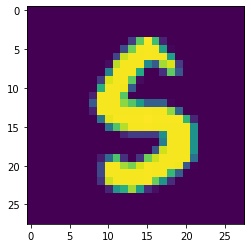

In [13]:
import random
import matplotlib.pyplot as plt

def Tensor2Image(tensor):
    image = tensor.numpy()
    plt.imshow(image.reshape(28, 28))

n = random.randint(0, 1000)

val_dataset = datasets.MNIST(
    root=configs['root'],
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

test_input, test_label = val_dataset[n]

print(f'Label: {test_label}')
Tensor2Image(test_input)

In [14]:
# Trained Network
net = NeuralNetwork()
net.load_state_dict(torch.load('best_model_weight.pth')) ### 8 ###
softmax = nn.Softmax(dim=1)

test_output = net(test_input)
test_prob = softmax(test_output)
test_predict = test_prob.argmax()

print(test_output)
print(test_prob)
print(test_predict)

tensor([[ -6.6698,  -1.5080,  -9.9481,  11.0717,  -8.3759,  19.9444,   3.2632,
         -13.0095,   2.1122,   1.9943]], grad_fn=<AddmmBackward0>)
tensor([[2.7641e-12, 4.8223e-10, 1.0418e-13, 1.4014e-04, 5.0185e-13, 9.9986e-01,
         5.6934e-08, 4.8779e-15, 1.8010e-08, 1.6006e-08]],
       grad_fn=<SoftmaxBackward0>)
tensor(5)
